In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
#import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
x_test.shape


(10000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [8]:
x_train /= 255
x_test /= 255


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.2158 - accuracy: 0.9348
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0876 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0606 - accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0463 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0372 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0291 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0262 - accuracy: 0.99100s - loss: 0.0260 - accura
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0228 - accuracy: 0.99220s -
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0198 - accuracy: 0.9930
Epoch 10/10
1875/1875 [===========

6


6

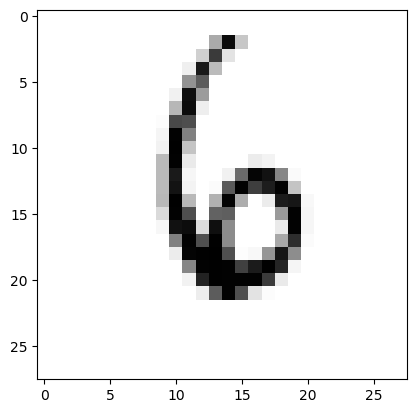

In [17]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
6


In [22]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)


In [23]:
y_predict

array([[1.8882604e-12, 2.9336150e-10, 1.3485719e-10, ..., 1.0000000e+00,
        3.2765639e-13, 2.4372240e-11],
       [3.6308047e-13, 1.9886009e-07, 9.9999976e-01, ..., 3.6071935e-19,
        5.0677863e-14, 3.9947377e-17],
       [6.0884267e-13, 9.9999988e-01, 1.1050749e-10, ..., 4.0232479e-08,
        8.0928353e-10, 2.3735246e-11],
       ...,
       [4.4141586e-23, 1.2121316e-12, 2.2529908e-17, ..., 8.4348993e-11,
        1.9251038e-11, 1.1488848e-08],
       [3.3202428e-17, 7.5402263e-15, 3.4677195e-20, ..., 3.0091652e-13,
        2.6133428e-08, 1.2715083e-15],
       [1.1647083e-09, 1.3406534e-12, 1.5700826e-07, ..., 8.7456342e-18,
        1.5861919e-11, 1.3304720e-15]], dtype=float32)

In [24]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test, axis=0)


In [25]:
y_test_digit_eval


7

In [27]:
y_predicts[8]


5

In [28]:
y_test_digit_eval


7

In [29]:
y_pre=pd.DataFrame(y_predicts)


In [30]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [31]:
y_test_digit_eval



7

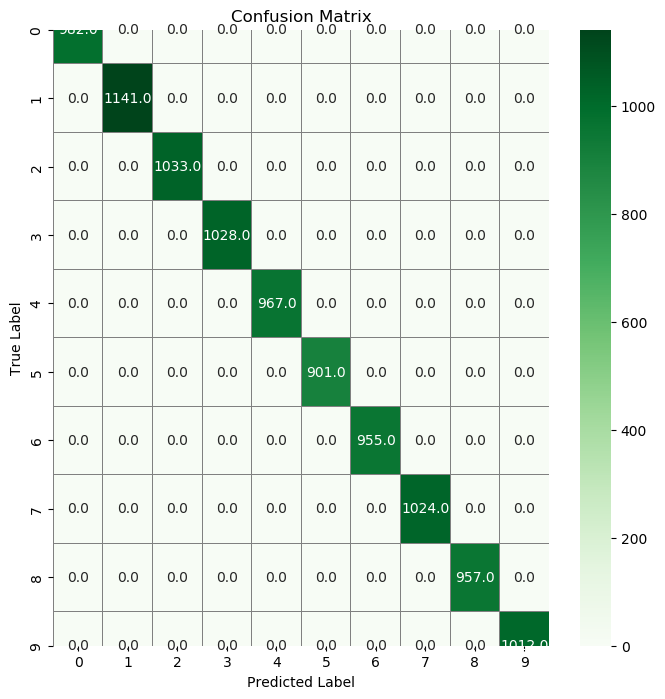

In [32]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

#Y_true = np.argmax(y_val,axis = 0) 

confusion_mtx = confusion_matrix(y_predicts, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [33]:
from sklearn.metrics import classification_report

print(classification_report( Y_pred_classes,y_predicts))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       982
           1       1.00      1.00      1.00      1141
           2       1.00      1.00      1.00      1033
           3       1.00      1.00      1.00      1028
           4       1.00      1.00      1.00       967
           5       1.00      1.00      1.00       901
           6       1.00      1.00      1.00       955
           7       1.00      1.00      1.00      1024
           8       1.00      1.00      1.00       957
           9       1.00      1.00      1.00      1012

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

